In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

In [ ]:
DATA = pd.read_csv('/content/drive/MyDrive/Carnegie Mellon University/15-688 Practical Data Science/hate_crime.csv',
                      low_memory=False)
DATA.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,ADULT_VICTIM_COUNT,JUVENILE_VICTIM_COUNT,TOTAL_OFFENDER_COUNT,ADULT_OFFENDER_COUNT,JUVENILE_OFFENDER_COUNT,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,5,"Cities from 10,000 thru 24,999",31-AUG-91,NaN,NaN,1,NaN,NaN,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,6,"Cities from 2,500 thru 9,999",19-SEP-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",04-JUL-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",24-DEC-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,3,"Cities from 50,000 thru 99,999",23-DEC-91,NaN,NaN,1,NaN,NaN,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [ ]:
data_df = DATA[['INCIDENT_ID','DATA_YEAR','STATE_ABBR','STATE_NAME','INCIDENT_DATE','TOTAL_OFFENDER_COUNT',
                'OFFENDER_RACE','VICTIM_COUNT','OFFENSE_NAME','LOCATION_NAME','BIAS_DESC','VICTIM_TYPES']].copy()

In [ ]:
data_df['OFFENDER_RACE'].unique()

array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander', nan], dtype=object)

In [ ]:
len(data_df['BIAS_DESC'].unique())

217

In [ ]:
asian_labels = [label for label in data_df['BIAS_DESC'].unique() if re.search('[Aa]sian', label)]
asian_labels

['Anti-Asian',
 'Anti-Asian;Anti-Gay (Male)',
 'Anti-Asian;Anti-Other Race/Ethnicity/Ancestry',
 'Anti-Asian;Anti-Black or African American',
 'Anti-American Indian or Alaska Native;Anti-Asian',
 'Anti-Asian;Anti-Atheism/Agnosticism',
 'Anti-Asian;Anti-Female',
 'Anti-Asian;Anti-Hispanic or Latino',
 'Anti-Arab;Anti-Asian;Anti-Black or African American',
 'Anti-Asian;Anti-Islamic (Muslim)',
 'Anti-Asian;Anti-White',
 'Anti-Asian;Anti-Multiple Races, Group',
 'Anti-Asian;Anti-Sikh',
 'Anti-Asian;Anti-Hindu',
 'Anti-Asian;Anti-Male;Anti-White',
 'Anti-Asian;Anti-Jewish',
 'Anti-Asian;Anti-Gay (Male);Anti-Jewish']

In [ ]:
asian_labels = [label for label in data_df['BIAS_DESC'].unique() if re.search('[Aa]sian|[Pp]acific', label)]
asian_labels

['Anti-Asian',
 'Anti-Asian;Anti-Gay (Male)',
 'Anti-Asian;Anti-Other Race/Ethnicity/Ancestry',
 'Anti-Asian;Anti-Black or African American',
 'Anti-American Indian or Alaska Native;Anti-Asian',
 'Anti-Native Hawaiian or Other Pacific Islander',
 'Anti-Asian;Anti-Atheism/Agnosticism',
 'Anti-Asian;Anti-Female',
 'Anti-Asian;Anti-Hispanic or Latino',
 'Anti-Male;Anti-Native Hawaiian or Other Pacific Islander',
 'Anti-Arab;Anti-Asian;Anti-Black or African American',
 'Anti-Asian;Anti-Islamic (Muslim)',
 'Anti-Asian;Anti-White',
 'Anti-Asian;Anti-Multiple Races, Group',
 'Anti-American Indian or Alaska Native;Anti-Native Hawaiian or Other Pacific Islander',
 'Anti-Asian;Anti-Sikh',
 'Anti-Asian;Anti-Hindu',
 'Anti-Asian;Anti-Male;Anti-White',
 'Anti-Asian;Anti-Jewish',
 'Anti-Asian;Anti-Gay (Male);Anti-Jewish']

In [ ]:
asian_df = data_df[(data_df['BIAS_DESC'].str.contains('Asian')) | (data_df['BIAS_DESC'].str.contains('Pacific'))]
len(asian_df)

6202

In [ ]:
asian_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6202 entries, 43 to 209400
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   INCIDENT_ID           6202 non-null   int64 
 1   DATA_YEAR             6202 non-null   int64 
 2   STATE_ABBR            6202 non-null   object
 3   STATE_NAME            6202 non-null   object
 4   INCIDENT_DATE         6202 non-null   object
 5   TOTAL_OFFENDER_COUNT  6202 non-null   int64 
 6   OFFENDER_RACE         6201 non-null   object
 7   VICTIM_COUNT          6202 non-null   int64 
 8   OFFENSE_NAME          6202 non-null   object
 9   LOCATION_NAME         6202 non-null   object
 10  BIAS_DESC             6202 non-null   object
 11  VICTIM_TYPES          6202 non-null   object
dtypes: int64(4), object(8)
memory usage: 629.9+ KB


In [ ]:
state_hc = asian_df.groupby('STATE_ABBR').agg(num_hate_crimes=('INCIDENT_ID','count'), state_name=('STATE_NAME', lambda x:x.unique()))
state_hc.sort_values('num_hate_crimes', ascending=False).head()

,num_hate_crimes,state_name
STATE_ABBR,,
CA,1716,California
MA,573,Massachusetts
NJ,519,New Jersey
WA,387,Washington
MN,249,Minnesota


In [ ]:
fig = px.choropleth(
    state_hc,
    locationmode='USA-states',
    scope='usa',
    locations=state_hc.index,
    color=state_hc.num_hate_crimes,
    hover_name='state_name',
)

fig.show()

In [ ]:
state_date_hc = asian_df.groupby(['STATE_ABBR','DATA_YEAR']).agg(hate_crime_count=('INCIDENT_ID','count'))
state_date_hc.head(25)

hate_crime_count
STATE_ABBR DATA_YEAR                  
AK         1993                      2
           1995                      1
           1997                      1
           2003                      1
           2004                      1
           2008                      1
           2012                      1
           2016                      1
AL         2007                      1
           2011                      1
           2014                      1
AR         1994                      2
           1995                      1
           2004                      2
           2005                      5
           2006                      3
           2007                      3
           2009                      1
           2010                      5
           2019                      1
AZ         1991                      2
           1992                      8
           1993                      9
           1994                      6
           1995                      9

In [ ]:
worst_states = (
    state_hc.sort_values('num_hate_crimes', ascending=False)
    .iloc[:5].index.tolist()
)
worst_states

['CA', 'MA', 'NJ', 'WA', 'MN']

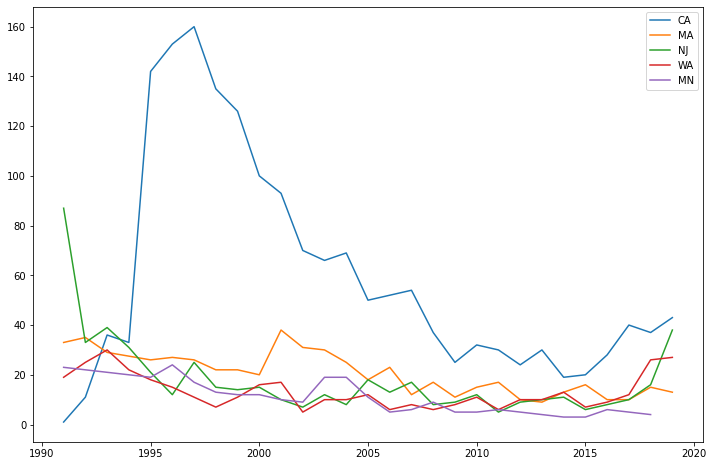

In [ ]:
plt.figure(figsize=(12,8))
for state in worst_states:
  df = state_date_hc.loc[state]
  plt.plot(df.index, df.hate_crime_count, label=state)
plt.legend()
plt.show()

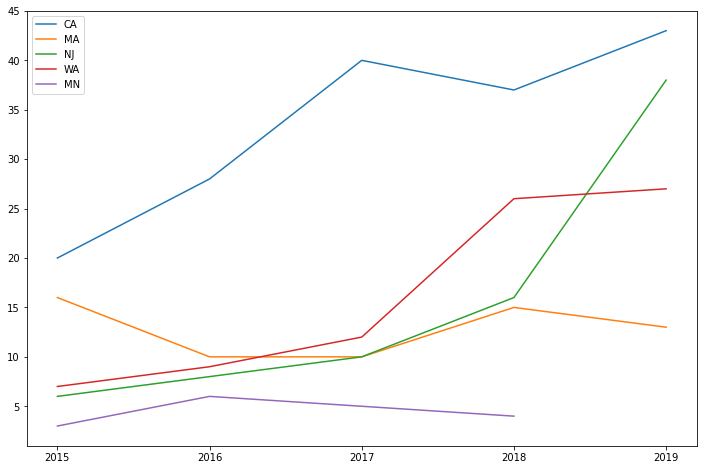

In [ ]:
df = state_date_hc.reset_index()
df = df[df['DATA_YEAR'].between(2015,2020)].set_index(['STATE_ABBR','DATA_YEAR'])
df = df[df.index.get_level_values(0).isin(worst_states)]
plt.figure(figsize=(12,8))
for state in worst_states:
  DF = df.loc[state]
  plt.plot(DF.index, DF.hate_crime_count, label=state)
  plt.xticks(np.arange(2015,2020))
plt.legend()
plt.show()

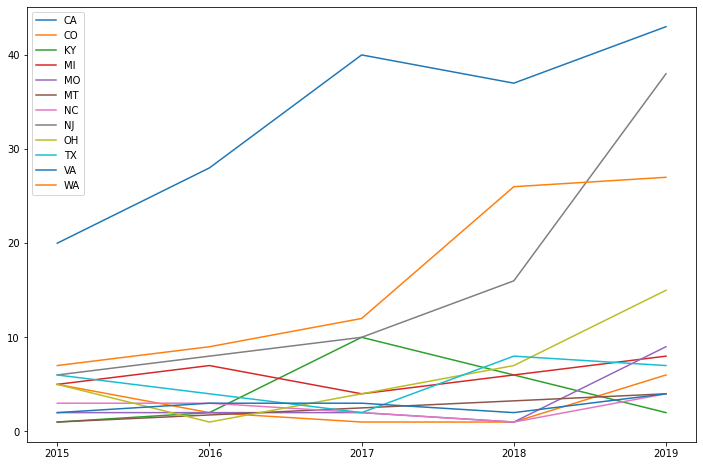

In [ ]:
df = state_date_hc.reset_index()
df = df[df['DATA_YEAR'].isin([2015,2019])]
df = df.groupby('STATE_ABBR').agg(num_year=('DATA_YEAR','count'))
df = df[df['num_year'] == 2]
states = df.index.tolist()
df = state_date_hc.loc[states]
df = df[df.index.get_level_values(1).isin([2015,2019])]
idx = pd.IndexSlice
df19 = df.loc[idx[:, 2019],:].reset_index().drop('DATA_YEAR', axis=1).set_index('STATE_ABBR').squeeze()
df15 = df.loc[idx[:, 2015],:].reset_index().drop('DATA_YEAR', axis=1).set_index('STATE_ABBR').squeeze()
diff = df19 - df15
increasing_states = diff[diff > 0].index.tolist()

plt.figure(figsize=(12,8))
for state in increasing_states:
  df = (
      state_date_hc.loc[idx[state, 2015:2019],:]
      .reset_index()
      .drop('STATE_ABBR', axis=1)
      .set_index('DATA_YEAR')
  )
  plt.plot(df.index, df.hate_crime_count, label=state)
  plt.xticks(np.arange(2015,2020))
plt.legend()
plt.show()